### Sentimental analysis
 

1. Performing the sentiment analysis using the following techniques: Logistic regression, Logistic regression with TFIDF vectorizer and Logistic regression with TFIDF vectorizer and n-grams techniques 
<br>
<br>
2. Analysing the accuracy of the models and determining the best approach
<br>
<br>
3. Identifying the highest-used words in each set of reviews, when grouped by rating
<br>
4. Applying the Navies bayes to get predict the positive or negative sentiment of Text review.

We will begin with importing the required libraries.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud
from fractions import Fraction
import re
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import  TfidfTransformer
from wordcloud import WordCloud, STOPWORDS

Lets import our file to perform the analysis

In [127]:
#reading the dataset
reviews= pd.read_json('Beauty_5.json',lines=True)

In [128]:
#we will genrate the HelpfulnessNumerator, HelpfulnessDenominator by heplful column
reviews[['HelpfulnessNumerator','HelpfulnessDenominator']] = pd.DataFrame(reviews.helpful.values.tolist(), index = reviews.index)
reviews

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator
0,7806397051,"[3, 4]",1,Very oily and creamy. Not at all what I expect...,"01 30, 2014",A1YJEY40YUW4SE,Andrea,Don't waste your money,1391040000,3,4
1,7806397051,"[1, 1]",3,This palette was a decent price and I was look...,"04 18, 2014",A60XNB876KYML,Jessica H.,OK Palette!,1397779200,1,1
2,7806397051,"[0, 1]",4,The texture of this concealer pallet is fantas...,"09 6, 2013",A3G6XNM240RMWA,Karen,great quality,1378425600,0,1
3,7806397051,"[2, 2]",2,I really can't tell what exactly this thing is...,"12 8, 2013",A1PQFP6SAJ6D80,Norah,Do not work on my face,1386460800,2,2
4,7806397051,"[0, 0]",3,"It was a little smaller than I expected, but t...","10 19, 2013",A38FVHZTNQ271F,Nova Amor,It's okay.,1382140800,0,0
5,7806397051,"[1, 2]",5,"I was very happy to get this palette, now I wi...","04 15, 2013",A3BTN14HIZET6Z,"S. M. Randall ""WildHorseWoman""",Very nice palette!,1365984000,1,2
6,7806397051,"[1, 3]",1,PLEASE DONT DO IT! this just rachett the palet...,"08 16, 2013",A1Z59RFKN0M5QL,"tasha ""luvely12b""",smh!!!,1376611200,1,3
7,7806397051,"[0, 1]",2,"Chalky,Not Pigmented,Wears off easily,Not a Co...","09 4, 2013",AWUO9P6PL1SY8,TreMagnifique,"Chalky, Not Pigmented, Wears off easily, Not a...",1378252800,0,1
8,9759091062,"[0, 0]",2,Did nothing for me. Stings when I put it on. I...,"07 13, 2014",A3LMILRM9OC3SA,NaN,"no Lightening, no Brightening,......NOTHING",1405209600,0,0
9,9759091062,"[0, 0]",3,I bought this product to get rid of the dark s...,"12 27, 2013",A30IP88QK3YUIO,Amina Bint Ibraheem,Its alright,1388102400,0,0


We will clean the data by dropping the duplicate entries based on reviewerID asin and unixReviewTime. Then we will add the helpfulness and upvote percentages. If the helpfulness denominator < 0, we will assign it helpful % of -1, else will take helpfulnessNumerator / helpfulnessDenominator and assign it a range in % upvote.

In [10]:
#Cleaning the data by eliminating duplicates
reviews.drop_duplicates(subset=['reviewerID', 'asin','unixReviewTime'],inplace=True)

#Adding the helpfulness and upvote percentages for metrics
reviews['Helpful %'] = np.where(reviews['HelpfulnessDenominator'] > 0, reviews['HelpfulnessNumerator'] / reviews['HelpfulnessDenominator'], -1)
reviews['% Upvote'] = pd.cut(reviews['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
reviews['Id'] = reviews.index;
reviews

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,Helpful %,% Upvote,Id
0,7806397051,"[3, 4]",1,Very oily and creamy. Not at all what I expect...,"01 30, 2014",A1YJEY40YUW4SE,Andrea,Don't waste your money,1391040000,3,4,0.750000,60-80%,0
1,7806397051,"[1, 1]",3,This palette was a decent price and I was look...,"04 18, 2014",A60XNB876KYML,Jessica H.,OK Palette!,1397779200,1,1,1.000000,80-100%,1
2,7806397051,"[0, 1]",4,The texture of this concealer pallet is fantas...,"09 6, 2013",A3G6XNM240RMWA,Karen,great quality,1378425600,0,1,0.000000,Empty,2
3,7806397051,"[2, 2]",2,I really can't tell what exactly this thing is...,"12 8, 2013",A1PQFP6SAJ6D80,Norah,Do not work on my face,1386460800,2,2,1.000000,80-100%,3
4,7806397051,"[0, 0]",3,"It was a little smaller than I expected, but t...","10 19, 2013",A38FVHZTNQ271F,Nova Amor,It's okay.,1382140800,0,0,-1.000000,Empty,4
5,7806397051,"[1, 2]",5,"I was very happy to get this palette, now I wi...","04 15, 2013",A3BTN14HIZET6Z,"S. M. Randall ""WildHorseWoman""",Very nice palette!,1365984000,1,2,0.500000,40-60%,5
6,7806397051,"[1, 3]",1,PLEASE DONT DO IT! this just rachett the palet...,"08 16, 2013",A1Z59RFKN0M5QL,"tasha ""luvely12b""",smh!!!,1376611200,1,3,0.333333,20-40%,6
7,7806397051,"[0, 1]",2,"Chalky,Not Pigmented,Wears off easily,Not a Co...","09 4, 2013",AWUO9P6PL1SY8,TreMagnifique,"Chalky, Not Pigmented, Wears off easily, Not a...",1378252800,0,1,0.000000,Empty,7
8,9759091062,"[0, 0]",2,Did nothing for me. Stings when I put it on. I...,"07 13, 2014",A3LMILRM9OC3SA,NaN,"no Lightening, no Brightening,......NOTHING",1405209600,0,0,-1.000000,Empty,8
9,9759091062,"[0, 0]",3,I bought this product to get rid of the dark s...,"12 27, 2013",A30IP88QK3YUIO,Amina Bint Ibraheem,Its alright,1388102400,0,0,-1.000000,Empty,9


**Getting the sentiments based on overall review score**

In [36]:
reviews["sentiment"] = reviews["overall"].apply(lambda score: "positive" if score > 3 else "negative")
reviews.head(5)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,Helpful %,% Upvote,Id,summaryClean,sentiment
0,7806397051,"[3, 4]",1,Very oily and creamy. Not at all what I expect...,"01 30, 2014",A1YJEY40YUW4SE,Andrea,Don't waste your money,1391040000,3,4,0.75,60-80%,0,don t waste your money,negative
1,7806397051,"[1, 1]",3,This palette was a decent price and I was look...,"04 18, 2014",A60XNB876KYML,Jessica H.,OK Palette!,1397779200,1,1,1.00,80-100%,1,ok palette,negative
2,7806397051,"[0, 1]",4,The texture of this concealer pallet is fantas...,"09 6, 2013",A3G6XNM240RMWA,Karen,great quality,1378425600,0,1,0.00,Empty,2,great quality,positive
3,7806397051,"[2, 2]",2,I really can't tell what exactly this thing is...,"12 8, 2013",A1PQFP6SAJ6D80,Norah,Do not work on my face,1386460800,2,2,1.00,80-100%,3,do not work on my face,negative
4,7806397051,"[0, 0]",3,"It was a little smaller than I expected, but t...","10 19, 2013",A38FVHZTNQ271F,Nova Amor,It's okay.,1382140800,0,0,-1.00,Empty,4,it s okay,negative


#### Exploratory Data Analysis(EDA)
Lets make a heatmap of % upvote and overall 

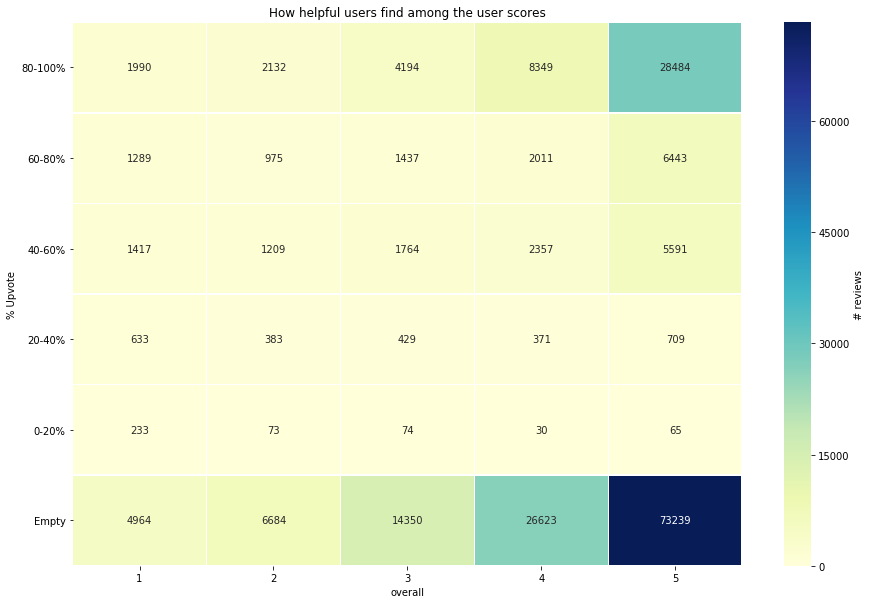

In [11]:
#getting heatmap
df_s = reviews.groupby(['overall', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among the user scores')
plt.show()

Based on the heatmap, we can see that there are users that have given overall = 3, this is a neutral review. Therefore, we will now remove the neutral reviews adn assign value to 1 to reviews with overall < 3 as 0 and overall > 3 as 1. This will help us in performing regression. 

In [12]:
df =  reviews[reviews['overall'] != 3]
X = df['reviewText']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df['overall'].map(y_dict)

#### Performing logistic regression:

We will now perform logistic regression. The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary. We will create test train model and sort the words based. Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text, and which may be removed to avoid them being construed as signal for prediction. Sometimes, however, similar words are useful for prediction, such as in classifying writing style or personality.

**Getting the top 20 negatives and positive words from reviews**

In [13]:
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 72694
# train records: 132190
# test records: 44064


C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.9249500726216412

-Top 20 positive-
Word  Coefficient
 pleasantly     2.384222
     hooked     2.257317
     staple     2.200133
  skeptical     2.153173
 complaints     2.011397
    pleased     1.894847
  subscribe     1.871199
 noticeably     1.864546
complaining     1.842625
    amazing     1.820935
    awesome     1.805127
      evens     1.785057
      steal     1.770832
      voila     1.744727
      stare     1.742338
   balanced     1.728774
     ankles     1.694506
     highly     1.691701
       beat     1.676484
     amazed     1.672222

-Top 20 negative-
Word  Coefficient
       adapter    -1.982834
  disappointed    -1.994480
          nope    -1.994674
          tugs    -1.997749
       garbage    -2.010767
      returned    -2.013849
        wiring    -2.023692
        nubian    -2.054469
        flaked    -2.054793
           ugh    -2.079662
         snake    -2.132342
         threw    -2.138045
        tressa    -2.156535
         waste    -2.201173

**Baseline accuracy of the model is as follows:**

A baseline result is the simplest possible prediction. For some problems, this may be a random result, and in others in may be the most common prediction.
DummyClassifier is a classifier that makes predictions using simple rules.
This classifier is useful as a simple baseline to compare with other (real) classifiers

In [14]:
text_fit(X, y, c, DummyClassifier(),0)

# features: 72694
# train records: 132190
# test records: 44064
Model Accuracy: 0.7825662672476398


Here we got Accuracy of model 0.780. To boost the accuracyWe will apply TF-IDF vectorizer to logistic regression to improve the model accuracy. It Transforms text to feature vectors that can be used as input to estimator. In will help us to convert each token (word) to feature index in the matrix, each unique token gets a feature index.

### Tf-idf
Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Tf-idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.


In [15]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 72694
# train records: 132190
# test records: 44064
Model Accuracy: 0.9281726579520697

-Top 20 positive-
Word  Coefficient
      love    12.217327
     great     9.826824
   perfect     8.124969
   amazing     7.989484
      best     6.973668
    highly     6.916465
     works     6.566374
   awesome     6.181700
      nice     5.998487
      easy     5.993309
     helps     5.984361
   pleased     5.908600
 excellent     5.626778
     happy     5.440191
      glad     5.375078
      soft     5.336826
definitely     4.874709
 beautiful     4.687433
 wonderful     4.570399
    smooth     4.397937

-Top 20 negative-
Word  Coefficient
       reviews    -4.637585
         hopes    -4.661567
         broke    -4.811503
         threw    -4.969979
      returned    -4.974605
      terrible    -5.148619
       useless    -5.245654
           did    -5.251954
         worse    -5.310728
      horrible    -5.383293
         awful    -5.389344
        return    -5.429208
          d

Accuracy with tfidf has increased from 79.5 to 93.6. Logistic regression is now performed on TFIDF + n-grams. It can also be observed that words that don't indicate polarity of the sentiment are removed.

#### n-grams:
N-grams are contiguous sequences of n-items in a sentence. N can be 1, 2 or any other positive integers, although usually we do not consider very large N because those n-grams rarely appears in many different places.

When performing machine learning tasks related to natural language processing, we usually need to generate n-grams from input sentences. For example, in text classification tasks, in addition to using each individual token found in the corpus, we may want to add bi-grams or tri-grams as features to represent our documents. This post describes several different ways to generate n-grams quickly from input sentences in Python.


In [16]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 2177780
# train records: 132190
# test records: 44064
Model Accuracy: 0.9222267610748003

-Top 20 positive-
Word  Coefficient
            love    17.207290
           great    14.233636
         perfect    10.064959
           works     9.137805
         amazing     9.008506
            best     8.857616
            nice     8.613009
            easy     7.549170
            soft     7.205425
           happy     6.837663
           helps     6.653958
         awesome     6.578585
         pleased     6.210442
      definitely     6.142294
           price     5.930533
          highly     5.907272
       excellent     5.786386
highly recommend     5.758696
          smooth     5.670389
       beautiful     5.659967

-Top 20 negative-
Word  Coefficient
        hoping    -5.517294
disappointment    -5.532951
       thought    -5.665248
   waste money    -5.973677
       reviews    -6.284454
 disappointing    -6.363196
         broke    -6.443598
      terrible    -6.503862
 

It can be observed that accuracy of Logistic regression has not improved with n-grams. So, using n-grams did not help us much.

### Study of user behavior
The user behavior has to be analyzed to improve the model performance and understand the underlying reasons for the bad or good reviews. This also gives importance to word choices of a user when giving the reviews. 
As, there aresome user who explictly rate product bad or good if it vice versa. 

In [17]:
df_user = reviews.groupby(['reviewerID']).agg({'overall':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Rating count', 'Rating mean']
df_user = df_user.sort_values(by = 'Rating count', ascending = False)
print(df_user.head(10))

                Rating count  Rating mean
reviewerID                               
A2V5R832QCSOMX           204     4.377451
ALNFHVS3SC4FV            192     3.973958
AKMEY1BSHSDG7            182     4.587912
A3KEZLJ59C1JVH           154     3.662338
ALQGOMOY1F5X9            150     2.233333
A1UQBFCERIP7VJ           149     4.697987
A34BZM6S9L7QI4           149     4.395973
A3NHUQ33CFH3VM           131     4.534351
AEL6CQNQXONBX            123     4.186992
A281NPSIMI1C2R           119     4.647059


Count of ratings is considered to select the user and user with the id A3KEZLJ59C1JVH is randomly chosen

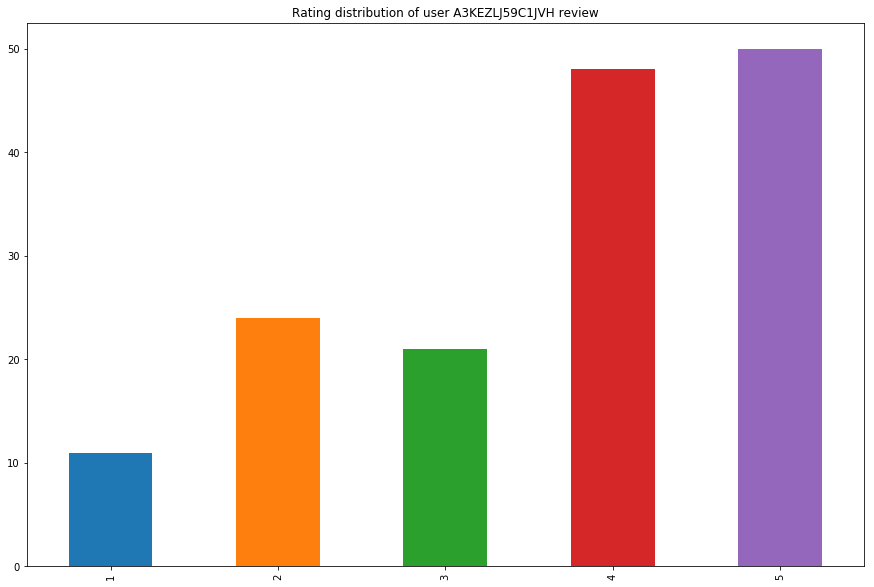

In [18]:
def plot_user(reviewerID):
    df_1user = reviews[reviews['reviewerID'] == reviewerID]['overall']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (15,10), title = 'Rating distribution of user {} review'.format(reviews[reviews['reviewerID'] == reviewerID]['reviewerID'].iloc[0]))
    plt.show()

plot_user('A3KEZLJ59C1JVH')

It can be observed that the user is generous with his ratings and probably happy with his products as most of his ratings are 4 and 5. This gives us idea about user behavioral aspetcs.

In [19]:
print(df_user[(df_user['Rating mean']<3.5) & (df_user['Rating mean']>2.5)].head())

                Rating count  Rating mean
reviewerID                               
A2P739KOM4U5JB           117     3.487179
ARYSDAZNRXN6G            110     3.436364
A2LW5AL0KQ9P1M           107     3.261682
APYKGTU0LFICH             82     2.865854
A2Y4S4CNGKF21S            76     3.460526


Now, one of the users with mean rating near 3 (APYKGTU0LFICH) is chosen to perform the analysis

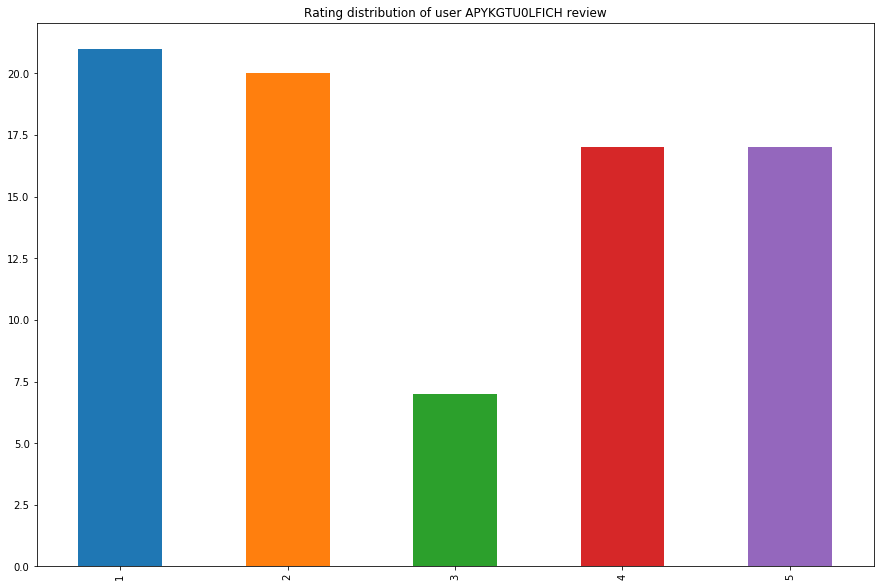

In [20]:
plot_user('APYKGTU0LFICH')

This have given rating of 1 or 2 to the most of products. As, we can sse that this user is not always satisfied with Products.  

**Most popular words used by the user for different ratings are observed. (2-grams and 3-grams are chosen for analysis)**
Here, we will analyzed the most pouplar words used by th user.
An N-gram is simply a sequence of N words. For instance, let us take a look at the following examples.

San Francisco (is a 2-gram)

The Three Musketeers (is a 3-gram)

She stood up slowly (is a 4-gram)

N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words. So here we are answering the question – how far back in the history of a sequence of words should we go to predict the next word? For instance, a bigram model (N = 2) predicts the occurrence of a word given only its previous word (as N – 1 = 1 in this case). Similarly, a trigram model (N = 3) predicts the occurrence of a word based on its previous two words (as N – 1 = 2 in this case).

In [129]:
def get_token_ngram(score, benchmark, userid='all'):
    '''This functions returns the top used words by the user  we have applied nltk word_tokenize to split the 
       sentence or text  into the words and then we will take that in total text if that word are not in stop word and 
       len is >=3 and apply bigrams and trigrams.  
        '''

    if userid != 'all':
        df = reviews[(reviews['reviewerID'] == userid) & (reviews['overall'] == score)]['reviewText']
    else:
        df = reviews[reviews['overall'] == score]['reviewText']
        
    count = len(df)
    total_text = ' '.join(df)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'v') for w in total_text]
    bigrams = ngrams(total_text,2)
    trigrams = ngrams(total_text, 3)

    # look at 2-gram and 3-gram together
    combine = chain(bigrams, trigrams)
    text = nltk.Text(combine)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])


In [22]:
# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_ngram(j, 0.25, 'APYKGTU0LFICH')
    print('score {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    print(test)

score 1 reviews most popular 2-gram / 3-gram:
   Count Occur %          Phrase
0    6.0  28.57%   (coily, hair)
1    6.0  28.57%  (thick, coily)
score 2 reviews most popular 2-gram / 3-gram:
   Count Occur %          Phrase
0    5.0   25.0%  (cystic, acne)
1    5.0   25.0%     (n't, like)
score 3 reviews most popular 2-gram / 3-gram:
    Count Occur %                          Phrase
0     4.0  57.14%                   (relax, hair)
1     4.0  57.14%                 (natural, hair)
2     3.0  42.86%                    (hair, feel)
3     3.0  42.86%                      (try, use)
4     2.0  28.57%                    (bulk, size)
5     2.0  28.57%                  (amount, give)
6     2.0  28.57%              (purchase, sample)
7     2.0  28.57%               (coconut, cowash)
8     2.0  28.57%                  (sample, size)
9     2.0  28.57%               (cowash, cleanse)
10    2.0  28.57%      (coconut, cowash, cleanse)
11    2.0  28.57%                (small, section)
12    2.0  28.

Here for user "APYKGTU0LFICH" we the count of words what he have used to int the reviews given by him. We see that this user has rating the reviews mostly postive as we can see that he have mostly used the good and plesent words.

**Sentiment analysis is performed using logistic regression. The usage of non-contextual features in reviews is observed. Also, the user behavior is analyzed and the popular words used by the users are determined.**

## Navies Bayes:
Naive Bayes is the most simple algorithm that you can apply to your data. As the name suggests, here this algorithm makes an assumption as all the variables in the dataset is “Naive” i.e not correlated to each other.

Naive Bayes is a very popular classification algorithm that is mostly used to get the base accuracy of the dataset.
**Multinomial-** 
The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.
**Bernoulli-**
Naive Bayes classifier for multivariate Bernoulli models.

Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features

### Feature extraction from reviewsText
Assign new dimension to each word and give the word counts.
We are also Cleaning the review text.
For text formating, we will use the Regex Functions. RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern. Python has a built-in package called re, which can be used to work with Regular Expressions. The sub() function replaces the matches with the text of your choice.We have also apply the strip() function which is used to remove all the leading and trailing spaces from a string.

In [25]:
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText
reviews["summaryClean"] = reviews["summary"].apply(cleanReviews)

train, test = train_test_split(reviews, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

158801 items in training data, 39701 in test data


#### Using TfidfTransformer().fit_transform
to fit the train and test data

In [38]:
countVector = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = countVector.fit_transform(train["summaryClean"])

#applying tfidf to term frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = countVector.transform(test["summaryClean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

In [89]:
y=reviews[['sentiment']]
y_train, y_test = train_test_split(y, test_size = 0.2)

### Wordcloud:
Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud. For this tutorial, you will learn how to create a WordCloud of your own in Python and customize it as you see fit. This tool will be quite handy for exploring text data and making your report more lively.

In [42]:
from wordcloud import WordCloud, STOPWORDS

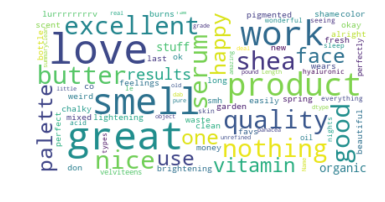

In [48]:
# Create and generate a word cloud image and showing the word cloud:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(reviews["summaryClean"]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

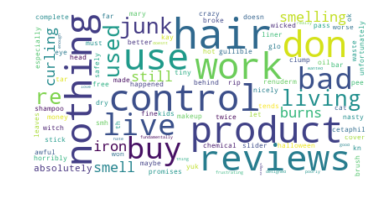

In [52]:
#Showing Low Scored words
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(reviews[reviews.overall == 1]["summaryClean"]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

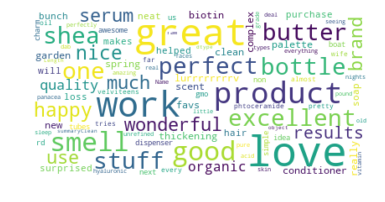

In [53]:
#Showing high scored words
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(reviews[reviews.overall == 5]["summaryClean"]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Multinomial Naïve Bayes learning method:
Multinomial Naive Bayes simply assumes multinomial distribution for all the pairs, which seem to be a reasonable assumption in some cases, i.e. for word counts in documents.It's is a specialized version of Naive Bayes that is designed more for text documents. It estimates the conditional probability of a particular word given a class as the relative frequency of term t in documents belonging to class(c).


In [119]:
model_Multinomial = MultinomialNB().fit(X_train_tfidf, y_train)
prediction_multi= model.predict(X_test_tfidf)


C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Bernoulli Naïve Bayes learning method
In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence features are used rather than term frequencies. If x is a boolean expressing the occurrence or absence of the i'th term from the vocabulary, then the likelihood of a document given a class.

In [120]:
model_Bernoulli = BernoulliNB().fit(X_train_tfidf, y_train)
prediction_Bernoulli = model.predict(X_test_tfidf)

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Visualize the accuracy, recall and f1-score 

In [113]:
print(classification_report(y_test, prediction_multi, target_names = ["positive", "negative"]))

              precision    recall  f1-score   support

    positive       0.00      0.00      0.00      8889
    negative       0.78      1.00      0.87     30812

   micro avg       0.78      0.78      0.78     39701
   macro avg       0.39      0.50      0.44     39701
weighted avg       0.60      0.78      0.68     39701



In [114]:
accuracy_score(y_test, prediction_multi)

0.7760257928011889

In [110]:
print(classification_report(y_test, prediction_Bernoulli, target_names = ["positive", "negative"]))

              precision    recall  f1-score   support

    positive       0.21      0.00      0.01      8889
    negative       0.78      1.00      0.87     30812

   micro avg       0.77      0.77      0.77     39701
   macro avg       0.49      0.50      0.44     39701
weighted avg       0.65      0.77      0.68     39701



In [115]:
accuracy_score(y_test, prediction_Bernoulli)

0.7739855419258961

**Testing the sentiments of Test reviews**

In [126]:
def testSentiments(model, testData):
    testCounts = countVector.transform([testData])
    testTfidf = tfidf_transformer.transform(testCounts)
    result = model.predict(testTfidf)[0]
    probability = model.predict_proba(testTfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), probability[0], probability[1]))

testSentiments(model_Multinomial, "Heavenly Highway Hymns")
testSentiments(model_Multinomial, "Great smelling shampoo!.")

Sample estimated as POSITIVE: negative prob 0.174808, positive prob 0.825192
Sample estimated as POSITIVE: negative prob 0.105223, positive prob 0.894777


### Conculsion:
By applying logistic regression on text review and overall review and using count vectorizer to tokenize the reviews, we were able to generate a test train model and get top 20 positive and negative words from the reviews. We got the baseline accuracy of 0.78. After applying TF-IDF vectorizer to logistic regression, we were able to improve the accuracy to 0.92. We have also implemented n-grams + TFIDF which gave us a similar accuracy of 0.92.

The second algorithm that we tried was naïve bayes. The Naive Bayes algorithm is an intuitive method that uses the probabilities of each attribute belonging to each class to make a prediction.  We used Multinomial and bernouli’s theorems to generate model for positive and negative sentiments and also predicted weather the review is positive or negative.

We have also studied user’s behavior by taking a random user and the mean of his ratings. The user that we randomly chose appears to be really happy with the products and is biased towards giving good reviews.

Results for logistic regression were better of the two algorithms that we used as the models were more accurate.

Below is the comparison for all the scores that we obtained by implemeting different algorithms.

Logistic Regression -

Model Accuracy: 0.7825662672476398

Logistic Regression with TFIDF -

Model Accuracy: 0.9281726579520697

Logistic Regression with TFIDF + ngrams -

Model Accuracy: 0.9222267610748003

Multinomial Naive Bayes -

Model Accuracy: 0.7760257928011889

Bernoulli's Naive Bayes -

0.7739855419258961

By the above data, we can say that logistic regression with TFIDF performs the best on our dataset.